## Bem-vinde ao nosso projeto de análise de dados e predição de uma base de dados de renda de adultos!! Neste projeto, iremos combinar uma análise dos dados com o uso de modelagem de machine learning. Este projeto será dividido em três partes:
**(i) Limpeza e tratamento dos dados** 

**(ii) Análise dos dados**

**(iii) Modelagem de machine learning**

### Parte I: Limpeza e tratamento dos dados

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Downloads\\adult.csv")

In [3]:
# Primeira olhada no nosso dataset
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<br />
Note acima que aparecem alguns valores "?". Os próximos passos nos mostrarão o que eles representam.
<br />
<br />

In [4]:
# Informações sobre as colunas do nosso dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<br />
Vemos que todas as colunas apresentam o mesmo número de valores não-nulos. Isto acende uma ideia na nossa cabeça: os valores nulos talvez estejam sendo representados pelo ponto de interrogação!!
<br />
<br />

In [5]:
# Checar se há dados duplicados
df.duplicated().any()

True

In [6]:
# Quantidade de NaN nas colunas do nosso dataframe
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<br />
Veja, nenhum valor nulo!! Mais uma coisa que nos faz acreditar que os valores nulos são os pontos de interrogação.
<br />
<br />

In [7]:
# Checar quais colunas têm valores "?" e quais quantidades
df.isin(["?"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
# Contando as ocorrências de valores nas colunas com "?"
for i in ["workclass", "occupation", "native-country"]:
    print(f"Contagem para {i}")
    print(df[i].value_counts())
    print("-----------------------------------------------------")

Contagem para workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
-----------------------------------------------------
Contagem para occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64
-----------------------------------------------------
Contagem para native-country
United-States                 43832
Mexico                          951
?                               857
Philippines          

<br />
Observe uma coisa: na coluna "workclass", a grande maioria das observações concentra-se em "Private" - daí, podemos preencher "?" com a moda das observações - isto é, com "Private". A mesma lógica dá-se para a coluna "native-country", a grande maioria das observações se concentra em "United States". Gostaríamos de fazer a mesma coisa com a coluna "occupation", mas note que a moda é bem pequena para podermos fazê-lo: então, não vai ter jeito, vamos ter que eliminar as linhas com "?" em "occupation".
<br />
<br />

In [9]:
df["workclass"] = df["workclass"].replace("?", "Private")
df["native-country"] = df["native-country"].replace("?", "United-States")
df.drop(df.index[df["occupation"] == "?"], inplace = True)

In [10]:
# Checando que não há mais nenhum "?" no dataset
df.isin(["?"]).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
# Eliminando a segunda observação das observações duplicadas, preservando a primeira observação
df.drop_duplicates(keep='first', inplace=True) 

In [12]:
# Criando a coluna de capital líquido e dropando a de capital ganho e perdido
df["net_capital"] = df["capital-gain"] - df["capital-loss"]
df.drop(["capital-gain", "capital-loss"], axis = 1, inplace = True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net_capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,7688
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,0


<br />
Note que, ao invés de termos duas colunas (uma para ganho e outra para perda de capital), poderíamos sumarizar as duas em apenas uma coluna, que é a coluna de capital líquido (chamei-a de net_capital pois o dataframe está todo em inglês).
<br />
<br />

### Parte II: Análise dos dados

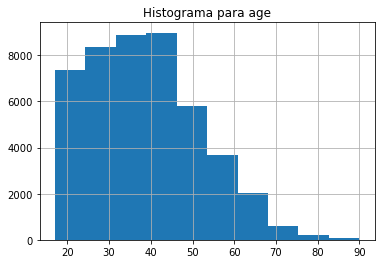

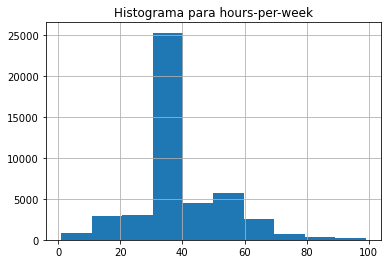

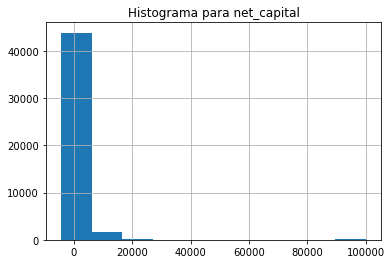

In [13]:
# Checar a distribuição dos dados nas colunas
for feature in ["age", "hours-per-week", "net_capital"]:
    df[feature].hist()
    plt.title(f"Histograma para {feature}")
    plt.show()

<br />
Vamos falar sobre cada histograma separadamente: <br />
O histograma da variável idade nos mostra que a distribuição de idade não é simétrica, sendo mais concentrada na faixa de 0 a 50 anos do que na de 50 a 100. Lembre-se que isto é normal, se deitarmos o histograma, a figura ficará muito parecida com uma pirâmide etária. <br />
Também, no histograma de horas trabalhadas por semana, a maioria das observações está concentrada em 30-40 horas. Isto também é relativamente esperado, pois jornadas de trabalho tendem a ser desse jeito: 30-40 horas por semana equivalentes 6-8 horas por dia (considerando que não trabalha-se no fim de semana). Também há algumas observações que se concentram em 15-20 horas por semana e outras que se concentram em 50-65 horas por semana, mas são relativamente poucas. <br />
No histograma de capital líquido, vê-se que a grande maioria das observações têm capital líquido igual a 0, enquanto que aquelas que não possuem capital líquido igual a 0, possuem um capital líquido muito grande (isso nos diz algo sobre desigualdade de renda?).
<br />
<br />

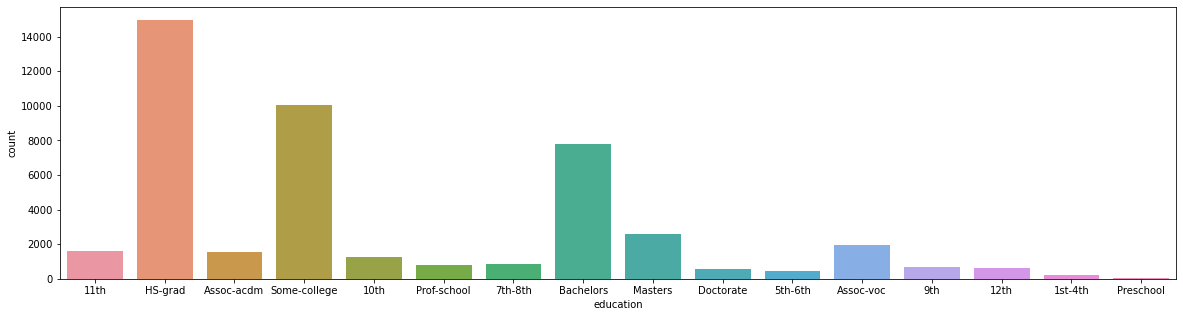

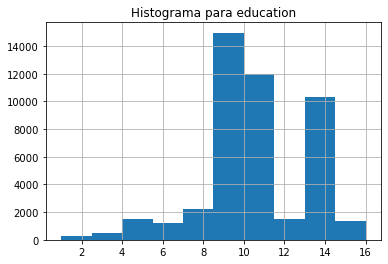

In [14]:
# Comparando o histograma para "educational-num" e o countplot para "education"
plt.figure(figsize=(20,5))
sns.countplot(x="education",data=df)
plt.show()
df["educational-num"].hist()
plt.title("Histograma para education")
plt.show()

<br />
Veja que ambas as colunas nos dão informações praticamente idênticas. Perceba, por exemplo, que no countplot, HS-grad (ensino médio completo) aparece com um pouco mais de 14000 ocorrências - olhe, agora, no histograma, a frequência dos valores entre 8 e 10 anos. Esta relação se repete com alguma consistência - o que nos indica uma coisa: podemos descartar uma das colunas para simplificar nossa análise e evitar que contemos duas informações "iguais" quando formos treinar nosso modelo. 
<br />
<br />

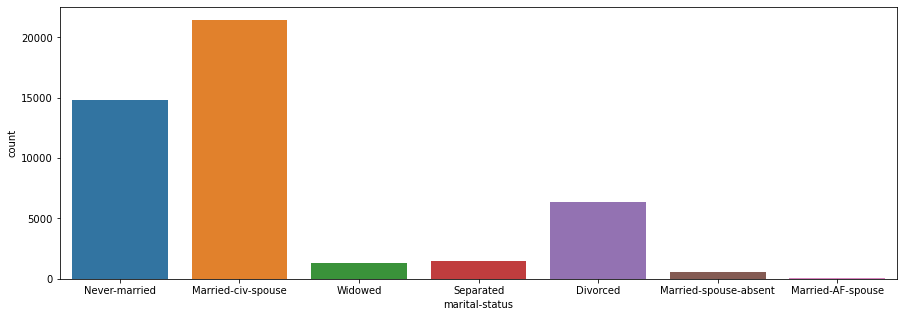

In [15]:
# Countplot para estado civil
plt.figure(figsize=(15,5))
sns.countplot(x="marital-status",data=df)
plt.show()

<br />
Vemos aqui que no censo, temos que o grupo com maior ocorrência é o de casados(as), enquanto o que tem a segunda maior ocorrência é o dos que nunca casaram, e o terceiro é o de divorciados. Uma conclusão que podemos tirar olhando para o plot é que é bem raro ter indivíduos que não se encaixam nos três grupos citados acima.
<br />
<br />

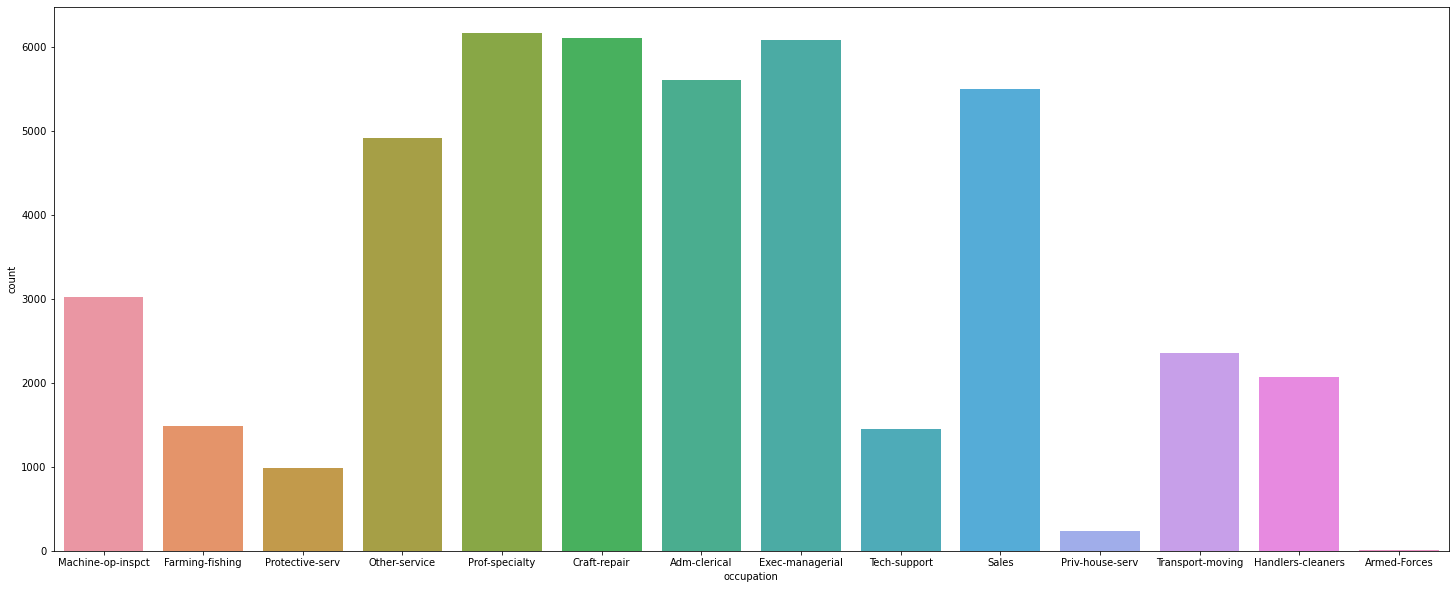

In [16]:
# Countplot para ocupação
plt.figure(figsize=(25,10))
sns.countplot(x="occupation",data=df)
plt.show()

<br />
Para esta coluna, já temos algo melhor distribuído, isto é, temos várias ocupações com observações em torno de 6000.
<br />
<br />

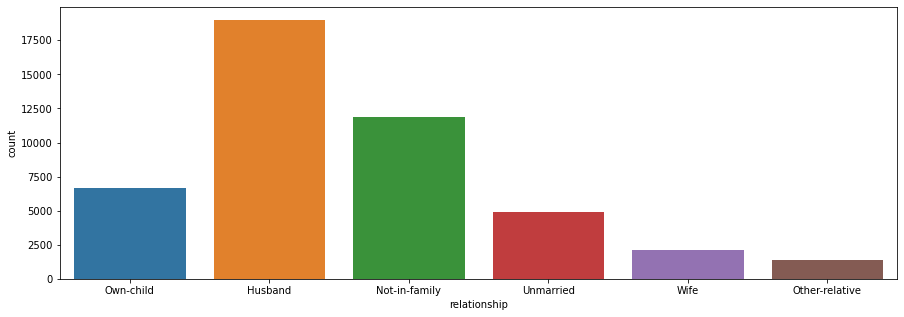

In [17]:
# Countplot para papel no relacionamento
plt.figure(figsize=(15,5))
sns.countplot(x="relationship",data=df)
plt.show()

<br />
Aqui, temos algo relativamente consistente com a coluna de estado civil. De fato, temos um pouco mais de 175000 observações de maridos, e algo em torno de 2500 de esposas. Se somarmos os dois valores, teremos algo acima de 20000 - exatamente o valor que aparece para "Married-civ-spouse" no countplot para estado civil!! Se analisarmos bem, este padrão se mantém em relação aos dois countplots.
<br />
<br />

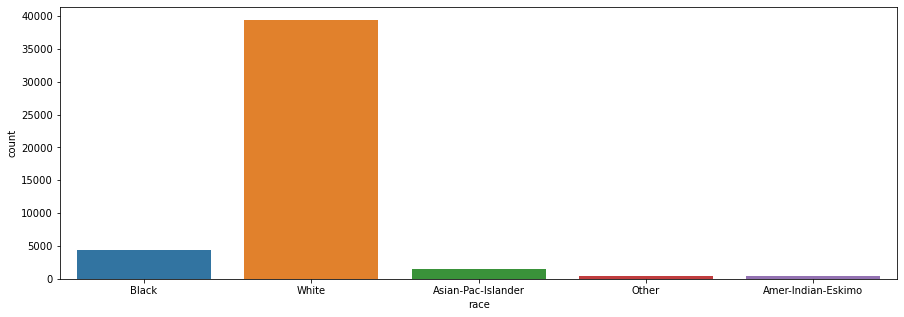

In [18]:
# Countplot para etnia
plt.figure(figsize=(15,5))
sns.countplot(x="race",data=df)
plt.show()

<br /> 
Grande maioria de brancos na amostra.
<br />
<br />

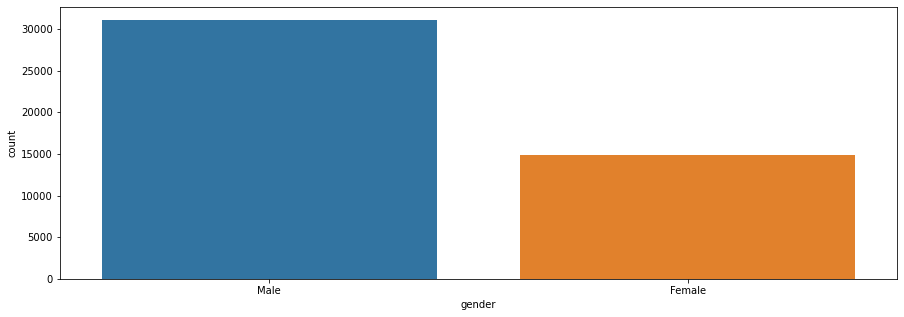

In [19]:
# Countplot para gênero
plt.figure(figsize=(15,5))
sns.countplot(x="gender",data=df)
plt.show()

<br /> Temos uma maioria de indivíduos do sexo masculino na amostra, com algo em torno de 30000 observações. Já as mulheres figuram com algo em torno de 15000 observações.
<br />
<br />

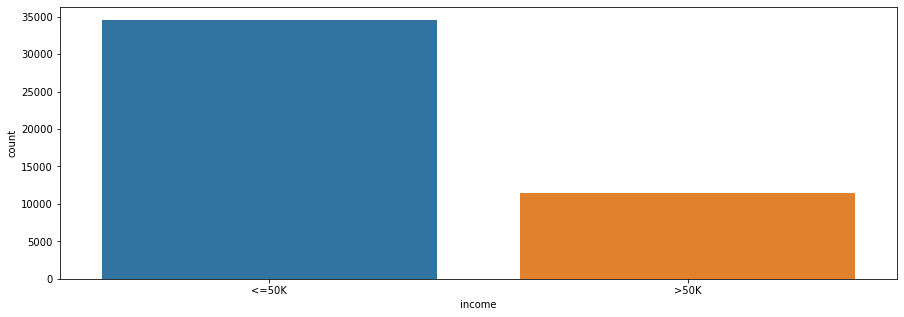

In [20]:
# Countplot para renda 
plt.figure(figsize=(15,5))
sns.countplot(x="income",data=df)
plt.show()

<br />
Chegamos à nossa coluna target. Este countplot dá-nos uma informação muito valiosa: a grande maioria dos indivíduos tem renda menor ou igual a 50k, enquanto a minoria tem renda maior a 50k. Sabendo disso, partiremos para uma análise bivariada (que relaciona duas variáveis); na nossa análise, queremos encontrar como as variáveis nas colunas influenciam os valores na coluna target e o quão intensamente elas o fazem. Note que, como vimos, a minoria dos indivíduos tem renda maior do que 50k. Se encontrarmos, em uma certa coluna, um valor para os quais os indivíduos têm - por exemplo - majoriamente renda maior do que 50k, saberemos que esta é uma coluna importante.
<br />
<br />

<AxesSubplot:xlabel='income', ylabel='age'>

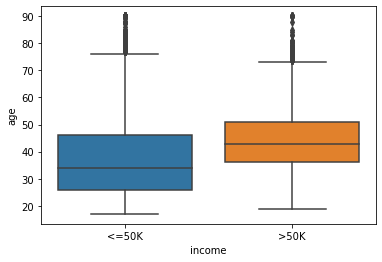

In [21]:
# Boxplot para idade agrupando por renda
sns.boxplot(x = "income", y = "age", data = df)

<br />
Este boxplot dá-nos algumas informações: de cara, vemos que aqueles indivíduos com renda maior do que 50k são, geralmente, mais velhos do que aqueles com renda menor ou igual a 50k (veja as medianas no box-plot). Também, temos mais observações entre o primeiro e o terceiro quartis para o grupo com renda menor ou igual a 50k, o que sugere que a idade é melhor distribuída para p grupo com renda menor ou igual a 50k em relação ao grupo com renda maior a 50k.
<br />
<br />

<AxesSubplot:xlabel='education', ylabel='count'>

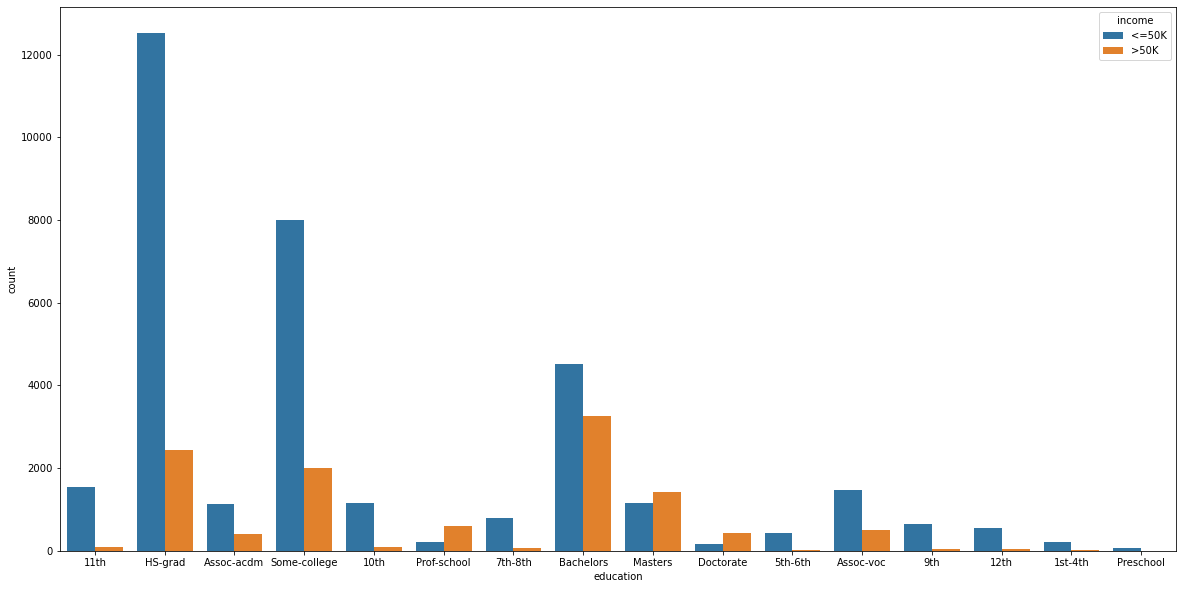

In [22]:
# Countplot para educação agrupando por renda
plt.figure(figsize = (20,10))
sns.countplot(x = "education", hue = "income", data = df)

<br />
Mais um gráfico que nos dá informações valiosíssimas: veja que, conforme o grau de educação vai aumentando, mais relativaemnte frequentes ficam as observações com indivíduos cuja renda é maior do que 50k. Quando chegamos no grau de mestre e doutor, vemos que a maioria dos indivíduos tem renda maior do que 50k. Enquanto isso, para aqueles que apenas terminaram o ensino médio ou nem isso, é raro que tenham renda maior do que 50k. Note ali, em "1st - 4th", "5th-6th", "9th" ou "12th", como a barra laranja é praticamente imperceptível.
<br />
<br />

<AxesSubplot:xlabel='workclass', ylabel='count'>

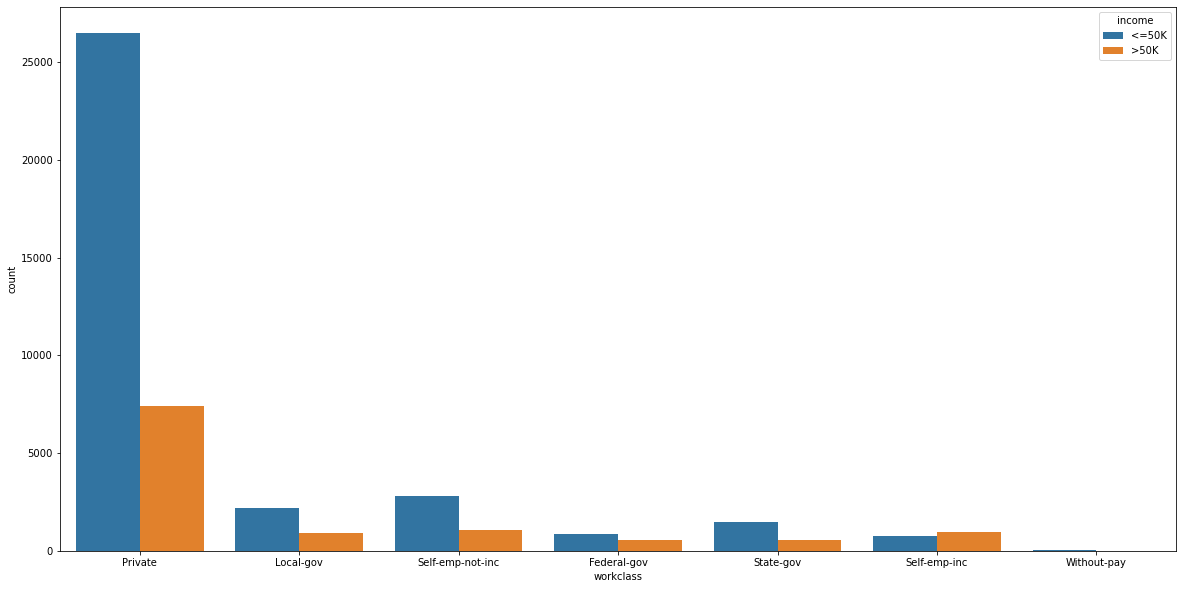

In [23]:
# Countplot para workclass agrupando por renda
plt.figure(figsize = (20,10))
sns.countplot(x = "workclass", hue = "income", data = df)

<br />
Veja que, em todos os grupos (a não ser self-emp-inc: pessoas que trabalham para si mesmas em entidades corporativas), a porção de observações de indivíduos cuja renda é menor ou igual a 50k é maior do que a outra porção.
<br />
<br />

<AxesSubplot:title={'center':'Papel no relacionamento X Renda '}, xlabel='relationship', ylabel='count'>

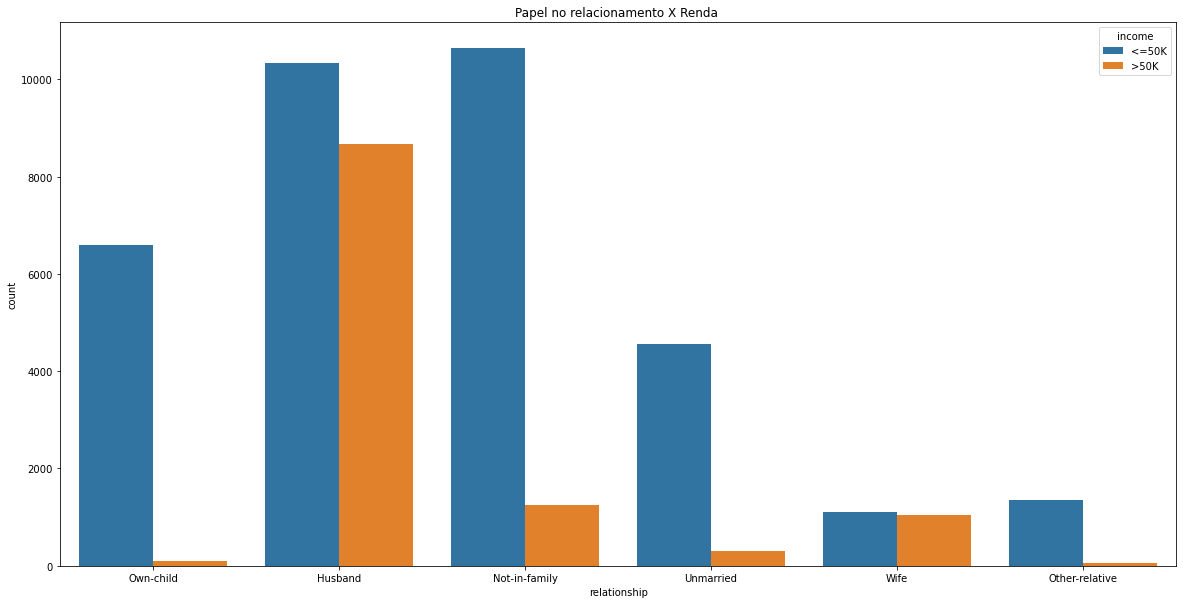

In [24]:
# Countplot para papel no relacionamento agrupando por renda
plt.figure(figsize = (20,10))
plt.title("Papel no relacionamento X Renda ")
sns.countplot(x = "relationship", hue = "income", data = df)

<AxesSubplot:title={'center':'Estado civil X Renda'}, xlabel='marital-status', ylabel='count'>

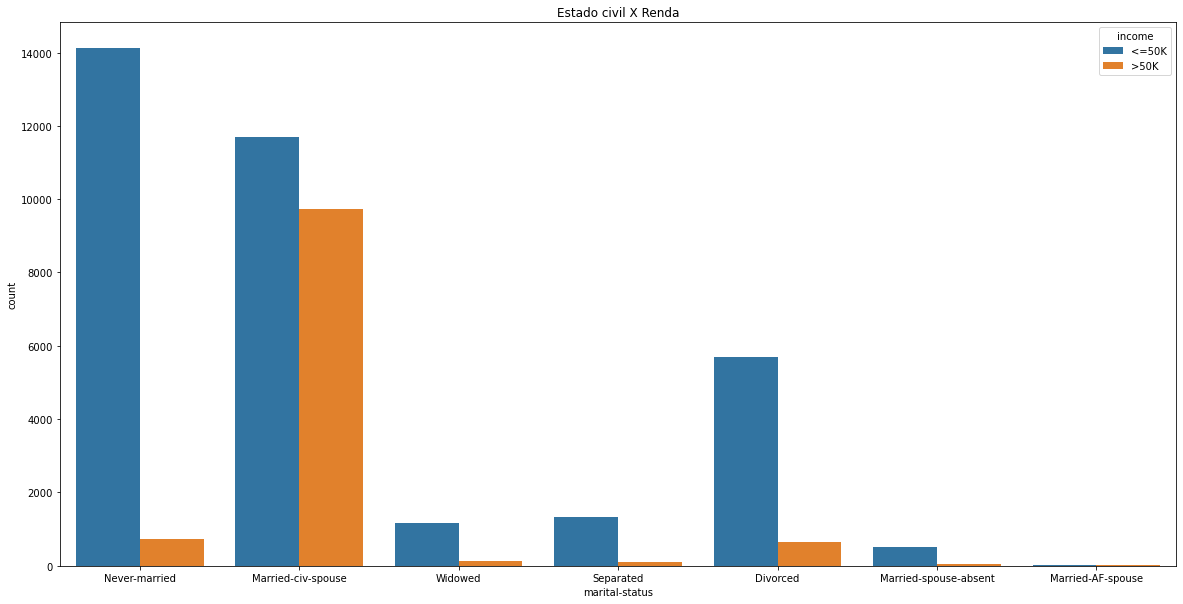

In [25]:
# Countplot para estado civil agrupando por renda
plt.figure(figsize = (20,10))
plt.title("Estado civil X Renda")
sns.countplot(x = "marital-status", hue = "income", data = df)

<br />
Como já tinhamos observado, as duas colunas são bem consistentes entre si. Veja como, para todos os grupos (das duas colunas), a proporção de indivíduos com renda menor ou igual a 50k é maior do que a proporção de indivíduos com a renda maior do que 50k. Mas, se olharmos para o plot de papel no relacionamento, os grupos com maiores proporção de indivíduos com renda acima de 50k são os de marido e esposa. Se olharmos para o plot para estado civil, os indivíduos com maior proporção de renda acima de 50k também são os casados!! A mesma coisa ocorre quando olhamos para os indivíduos que não estão em um relacionamento formal ou nunca se casaram, porém a tendência é contrária (menores proporções).
<br />
<br />

<AxesSubplot:xlabel='occupation', ylabel='count'>

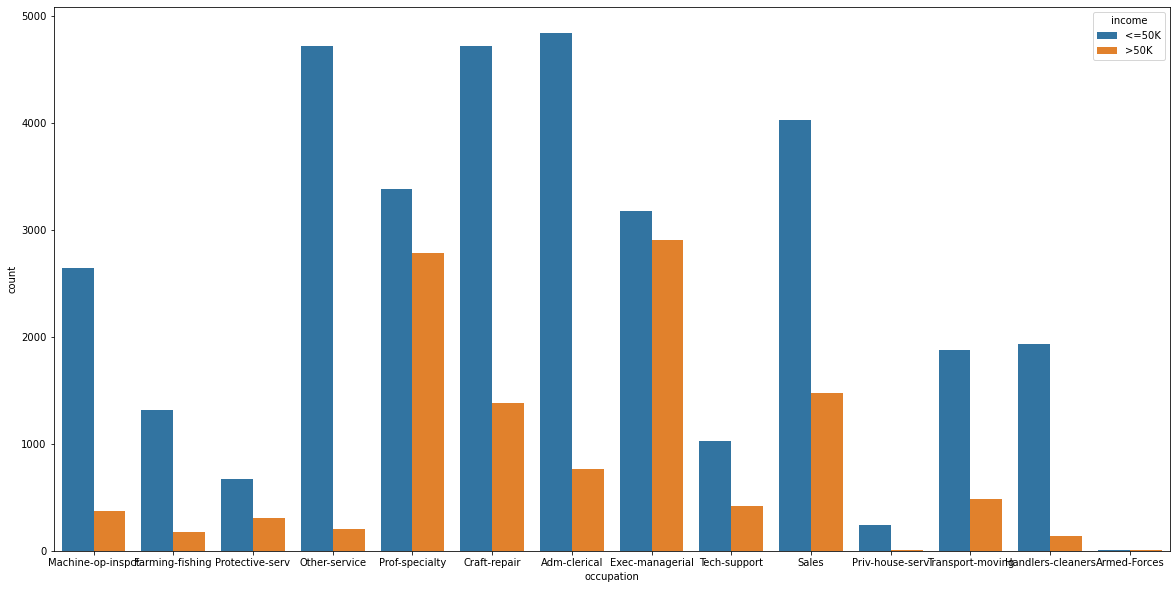

In [26]:
# Countplot para ocupação agrupando por renda
plt.figure(figsize = (20,10))
sns.countplot(x = "occupation", hue = "income", data = df)

<br />
Como temos muitos grupos, não é fácil tirar grandes conclusões, mas veja: temos grupos que claramente contam com maior proporção de indivíduos com renda maior do que 50k. Por exemplo, "Exec-managerial" e "Prof-speciality". Isto indica que esta é uma coluna que deve influenciar na nossa coluna target.
<br />
<br />

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

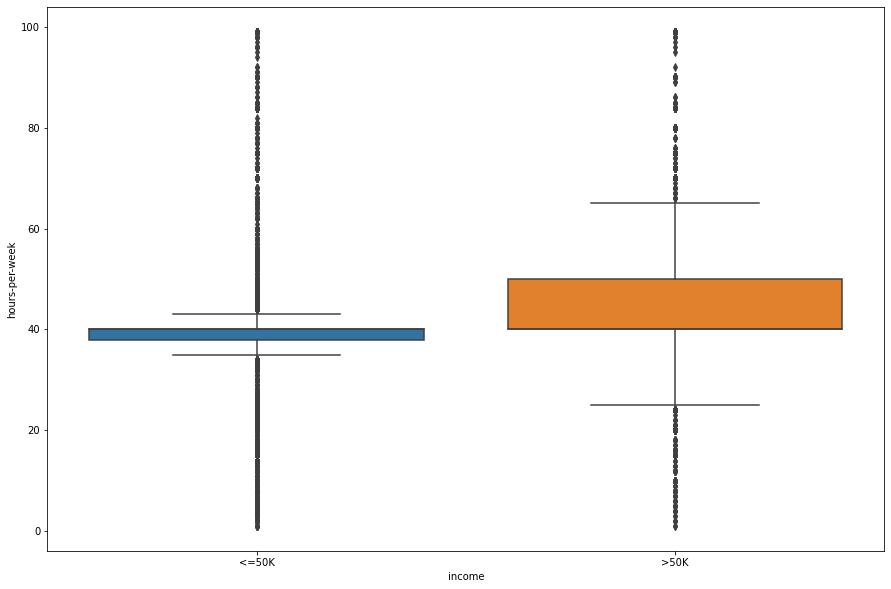

In [27]:
# Countplot para horas trabalhadas por semana agrupando por renda
plt.figure(figsize = (15,10))
sns.boxplot(x = "income", y = "hours-per-week", data = df)

<br />
Veja uma coisa: se olharmos a altura dos dois boxplots, podemos ver uma tendência na qual indivíduos que trabalharam mais horas por semana ganham mais. Contudo, há muitos valores discrepantes (outliers) nos dois box-plots, que sugerem variações nos dois grupos. A amplitude interquartil do grupo cuja renda é menor ou igual a 50k também é menor do que a amplitude interquartil do outro grupo.
<br />
<br />

<AxesSubplot:xlabel='income', ylabel='net_capital'>

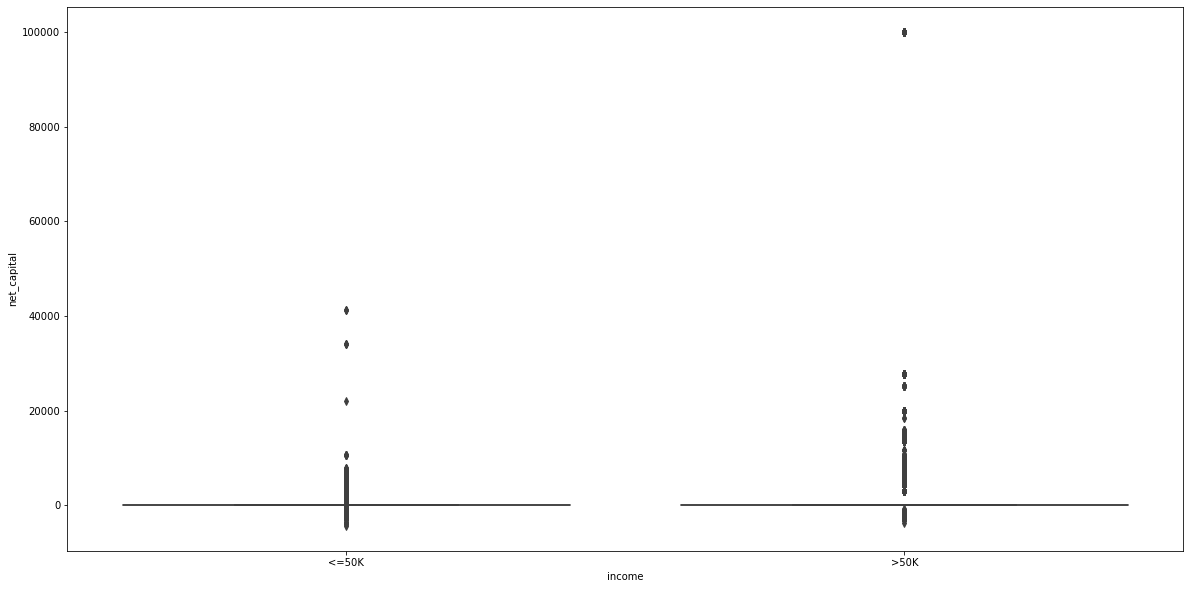

In [28]:
# Boxplot para capital líquido agrupando por renda
plt.figure(figsize = (20,10))
sns.boxplot(x = "income", y = "net_capital", data = df)

<br /> 
Boa parte do capital líquido está centrado em 0 para ambos os grupos (claro, ainda assim temos muitos outliers em ambos os grupos) - isto é, esta coluna não parece influenciar tanto na nossa coluna target.
<br />
<br />

<Figure size 1440x360 with 0 Axes>

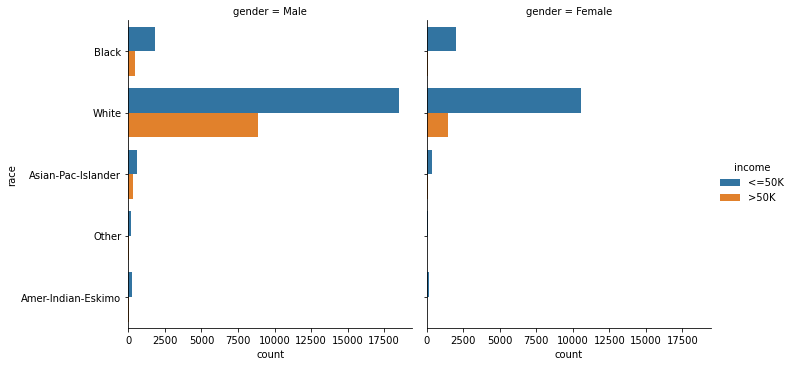

In [29]:
# Catplot para etnia agrupando por renda e segregando por gênero
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df)

<br /> 
Aqui, vamos começar a fazer uma análise multivariada. Notemos agora uma coisa: apesar de, em todos os grupos termos mais indivíduos com renda menor ou igual a 50k, vemos que homens brancos têm maior proporção de indivíduos com renda acima de 50k do que as mulheres brancas. Quando vamos analisar homens e mulheres negros, isto fica pior ainda: no gráfico aparentemente não vemos nenhuma mulher negra (a barrinha laranja é imperceptível!) com renda acima de 50K.
<br />
<br />

<Figure size 1440x360 with 0 Axes>

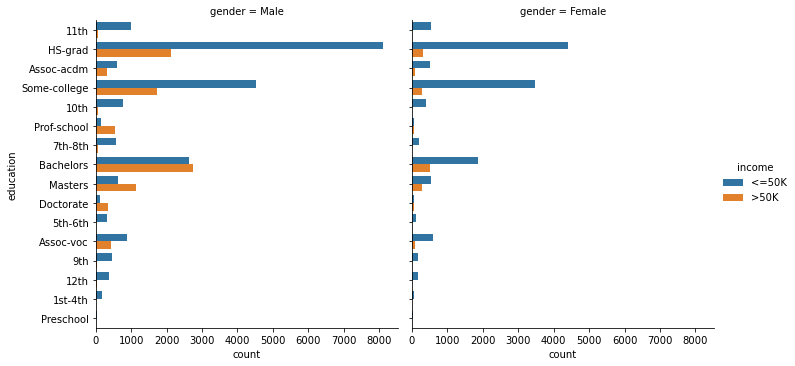

In [30]:
# Countplot para nível educacional agrupando por renda e segregando por gênero
plt.figure(figsize=(20,5))
sns.catplot(y="education", hue="income", kind="count",col="gender", data=df)

<br />
Veja que o padrão de homens figurarem com uma maior proporção de indivíduos com a renda maior do que 50k se mantém mesmo quando estudamos levando em conta o nível educacional. Veja como mesmo mulheres com mestrado têm, na maior parte, renda menor do que 50k! Mas isso não acontece só para o nível de mestre, mulheres com renda maior do que 50k são mais raras nos diversos grupos do que homens com renda maior que 50k.

<br />
<br />

** Análise de correlação: 
<br />
Agora que já desenvolvemos uma boa intuição sobre como as colunas do nosso dataframe afetam a coluna target, vamos medir a magnitude de como elas afetam: em outras palavras, vamos estudar a correlação entre as colunas do nosso dataframe. Para isso, teremos que transformar algumas variáveis categóricas em numéricas, tais como a própria coluna target e a coluna de gênero. Para a coluna target, ">50K" será substituído por 1 e "<=50K" será substituído por 0. Na coluna de gênero, "Male" será substituído por 1 e "Female" será substituído por 0 (faremos isso pois, como vimos, a desigualdade de gênero apareceu na nossa análise e homens aparentam ter maior renda do que mulheres, e isto aparecerá como uma correlação positiva, se adotarmos a convenção que criei para substituir os valores).
<br />
<br />

In [31]:
df["income"] = df["income"].replace(">50K", 1)
df["income"] = df["income"].replace("<=50K", 0)
df["gender"] = df["gender"].replace("Male", 1)
df["gender"] = df["gender"].replace("Female", 0)

In [32]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,net_capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,40,United-States,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,50,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,40,United-States,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,United-States,1,7688
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,1,30,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,38,United-States,0,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,United-States,1,0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,40,United-States,0,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,20,United-States,0,0


In [33]:
# Matriz de correlação das colunas do nosso dataframe
df.corr()

,age,fnlwgt,educational-num,gender,hours-per-week,income,net_capital
age,1.000000,-0.075565,0.037210,0.081548,0.101802,0.237133,0.076463
fnlwgt,-0.075565,1.000000,-0.040168,0.028707,-0.018359,-0.006831,-0.004009
educational-num,0.037210,-0.040168,1.000000,0.005250,0.145398,0.332463,0.121720
gender,0.081548,0.028707,0.005250,1.000000,0.230172,0.215747,0.044453
hours-per-week,0.101802,-0.018359,0.145398,0.230172,1.000000,0.226743,0.079750
income,0.237133,-0.006831,0.332463,0.215747,0.226743,1.000000,0.213032
net_capital,0.076463,-0.004009,0.121720,0.044453,0.079750,0.213032,1.000000


<AxesSubplot:>

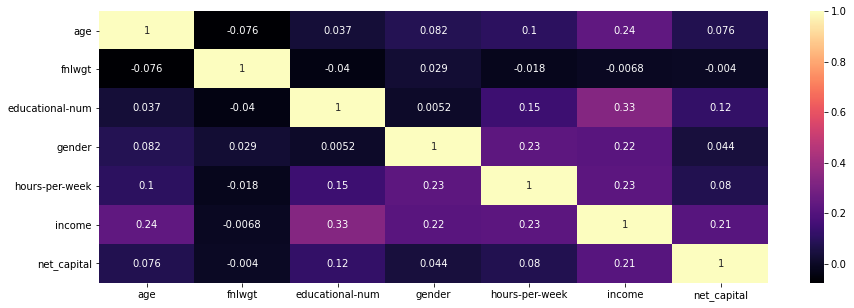

In [34]:
# Mapa de calor da matriz de correlação
fig, axes = plt.subplots(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True,  cmap = "magma")

<br />
Perceba como a matriz de correlação nos deu uma informação que não era possível de obter apenas na visualização de dados: o capital líquido guarda uma correlação positiva com a renda da mesma magnitude que outras variáveis como gênero ou horas trabalhadas por semana. Por outro lado, a coluna "fnlwgt" não tem uma correlação significativa com a coluna target: vamos então descartá-la.
<br />
<br />

In [35]:
# Descartando a coluna "fnlwgt"
df.drop("fnlwgt", inplace = True, axis = 1)

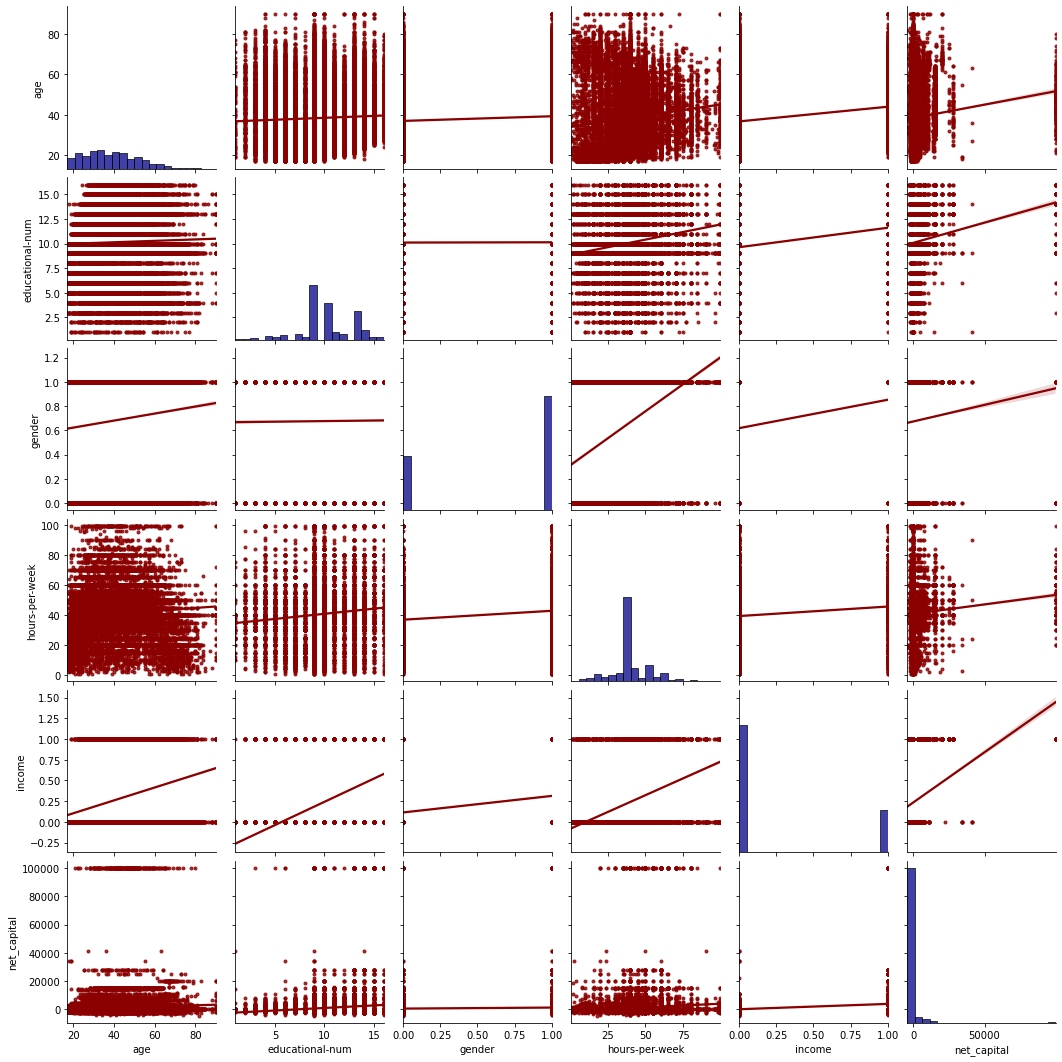

In [36]:
# Pairplot do dataframe, usando regressão linear
sns.pairplot(data = df, kind='reg', diag_kws={"bins":20, "color":"darkblue","edgecolor":"black"},
            plot_kws={"marker":".","color":"darkred"})

<br />
Nesse pairplot, buscamos perceber visualmente as correlações que obtivemos pela matriz de correlação. Note que conseguimos ver claramente as relações positivas obtidas entre a coluna target e as demais colunas representadas no plot. Veja - para a coluna target - que apesar de termos retas não-horizontais, nossos pontos distribuem-se em faixas horizontais, mas não estranhe! Isto se deve ao fato de termos apenas dois valores possíveis, 0 ou 1.

<br />
<br />
Conclusão da análise dos dados: <br / >
Estudamos tanto as features isoladamente quanto relacionamos umas com as outras. Para prosseguirmos precisamos lembrar das relações que extraímos entre as colunas do dataframe: primeiro, vimos que há uma relação entre a coluna de idade e a coluna de renda. O grupo com renda acima de 50K tem indivíduos, em geral, mais velhos do que o outro grupo. Também, vimos que o nível educacional guarda uma importante relação com a renda: neste caso, indivíduos com maior nível educacional aparentam ter mais renda - apesar de haverem alguns problemas quando colocamos o fator "gênero" na jogada; também, sobre educação, vimos que as colunas de nível educacional e de educação trazem-nos informações praticamente idênticas - o que permitir-nos-á, para fins do nosso modelo, descartar uma das colunas. Também, o estado civil parece estar muito relacionado com a renda: claramente, vimos que indivíduos casados tendem a ter renda maior do que aqueles não casados; assim como entre as colunas de anos de educação e nível educacional, as colunas de estado civil e papel no relacionamento transmitem informações idênticas (também, note que se combinarmos as informações das colunas estado civil e gênero, teremos como deduzir boa parte da coluna de papel no relacionamento), assim, poderemos descartar uma das duas colunas. A coluna de horas trabalhadas por semana também nos dá informações importantes: como esperaramos, indivíduos que trabalham mais horas por semana tendem a ter renda maior. A coluna de capital líquido inicialmente não parecia que seria tão importante, mas quando fizemos a análise da correlação entre ela e a coluna de renda, vimos que ela é (em termos de valor da correlação!!) tão importante quanto algumas que consideramos imprescindíveis. Por fim, fizemos algumas análises multivariadas e obtivemos resultados que não podem ser ignorados: apesar de termos tendências gerais (indivíduos com melhores níveis educacionais têm maior renda, etc.), quando segregamos por gênero e etnia, vemos claramente que há grupos mais privilegiados (infelizmente). Como já esperávamos, homens e brancos têm maior renda se segregarmos por gênero e etnia quando analisarmos as colunas (isto é, por exemplo: quando vemos o nível educacional, indivíduos com maior nível educacional tendem a ter maior renda, mas ainda assim os homens/brancos(as) aparecem na frente de mulheres/negros(as), considerando mesmo nível educacional).

### Parte III: Modelagem de machine learning

In [37]:
X = df.drop(columns = ["marital-status", "education", "income"])
y = df["income"]

<br />
Aqui, fazemos aquilo que já tinhamos mencionado: para fins da nossa modelagem, podemos descartar algumas colunas que são idênticas a algumas outras. Neste caso, vamos descartar a coluna de "estado civil", pois ela é redundante quando consideramos a coluna "relationship", e vamos descartar a coluna de nível de educação, pois ela nos dá informações idênticas à coluna que nos diz os anos dedicados à educação.
<br />
<br />

In [38]:
# Criando variáveis dummy para as colunas com dados categóricos
X = pd.get_dummies(X, columns = ["workclass", "educational-num", "relationship", "occupation", "race", "native-country"])

In [39]:
# Dividindo os dados entre conjunto de teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, random_state = 0)

In [40]:
# Pré-processando os dados usando StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
# Criando o modelo
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [42]:
# Computando a acurácia
print (f"A acurácia do nosso modelo é de {round(logreg.score(X_test_scaled, y_test)*100, 3)}%")

A acurácia do nosso modelo é de 84.5%


<br />
Bom sinal! Nosso modelo acertou 84.5% das previsões. Contudo, precisamos buscar outras métricas! Como sabemos, temos muito mais indivíduos do tipo 0 (renda menor ou igual a 50K) do que do tipo 1 (renda maior do que 50K). Imagine que temos 75% de indivíduos do tipo 0: se nosso modelo fizesse uma previsão em que todos os indivíduos fossem do tipo 0, ainda teríamos uma acurácia de 75%, mesmo errando para todos os indivíduos do tipo 1. Daí, precisamos encontrar outras métricas e avaliar nosso modelo com base nelas!! Porém, apesar disso, a acurácia é um bom primeiro sinal para nós.
<br />
<br />

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

[[7993  661]
 [1121 1722]]


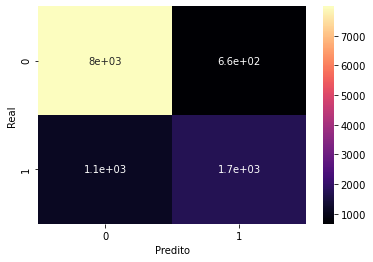

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,  cmap = "magma")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

<br />
Agora, podemos interpretar alguns resultados. Veja que, para o tipo 0, nosso modelo preveu corretamente 7993 indivíduos e classificou 661 indivíduos do tipo 0 como sendo do tipo 1. Note que, como os indivíduos do tipo 1 são mais raros, é esperado que nosso modelo não classifique muitos indivíduos do tipo 0 como sendo do tipo 1, mas sim o contrário. Note que o contrário realmente acontece, 1121 indivíduos do tipo 1 foram classificados como do tipo 0 pelo nosso modelo (o que é um ponto fraco dele), enquanto 1722 foram classificados corretamente.
<br />
<br />

In [45]:
# Computando o classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8654
           1       0.72      0.61      0.66      2843

    accuracy                           0.85     11497
   macro avg       0.80      0.76      0.78     11497
weighted avg       0.84      0.85      0.84     11497



<br />
A precisão é uma medida de quantas previsões dentre as feitas foram certas - sendo assim, olhando na tabela, vemos que para 100 previsões do tipo 0, nosso modelo acertou 88, enquanto que para 100 previsões do tipo 1, o nosso modelo acertou 72. Já o recall é uma medida de quanto o modelo acertou nas previsões de um tipo em relação à quantidade de indivíduos daquele tipo. Sendo assim, para 100 indivíduos do tipo 0, nosso modelo classificou corretamente 92 deles e para 100 indivíduos do tipo 1, nosso modelo classificou corretamente 61 deles. Já esperávamos que nosso modelo teria mais dificuldades com o tipo 1 por ele ser mais raro. <br />
Como precision e recall são duas métricas importantíssimas mas que versam sobre coisas diferentes, o f1-score tenta juntar estas duas métricas, sendo uma média harmônica entre elas. É interessante olhar para essa medida pois, para bases de dados como a nossa, é relativamente difícil ter um recall excepcional e a precisão também deve ser levada em conta - o que nos leva a olhar com algum carinho para o f1-score.
<br />
<br />